In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import pickle
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv("data/sub_1.csv")

In [3]:
data

,SubNo,SegNo,AVppAmp,SDppAmp,SDSDppAmp,RMSSDppAmp,AVpw,SDpw,SDSDpw,RMSSDpw,...,PoincareSD2,ratioSD1SD2,CCM,HjorthActivity,HjorthMobility,HjorthComplexity,lam,HFD,KFD,Class
0,1,1,0.006709,0.000979,0.000804,0.001411,0.449183,0.132442,0.070278,0.102845,...,1411.941562,0.039988,1.227430e-08,1,0.010411,41.021530,136.561423,1.300122,1.000006,6
1,1,2,4.641927,0.707311,0.602373,0.987717,0.415554,0.122198,0.048761,0.083460,...,915.793357,1.033208,3.773210e-07,1,1.329995,1.251437,84.029234,1.994388,1.055329,6
2,1,3,4.576796,0.620150,0.536944,0.855869,0.456689,0.121285,0.066370,0.108959,...,996.863623,1.002636,3.976340e-07,1,1.323966,1.264635,83.635191,1.997516,1.055113,6
3,1,4,4.624681,0.764361,0.624150,1.026587,0.480042,0.138293,0.069621,0.136883,...,1017.009484,0.920768,3.485810e-07,1,1.328367,1.260437,87.537957,1.995013,1.055506,6
4,1,5,0.019445,0.012603,0.009917,0.011559,0.480410,0.118619,0.069744,0.107834,...,1411.574303,0.044405,1.406710e-08,1,0.011125,57.923784,112.121415,1.390540,1.000007,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,1,1242,2.633016,0.313741,0.227124,0.287896,0.816297,0.106172,0.064747,0.083268,...,1347.241517,0.315498,1.051150e-07,1,0.063364,3.551484,300.090311,1.062490,1.000242,6
1242,1,1243,2.630386,0.123158,0.076368,0.118452,0.877214,0.046359,0.009831,0.014539,...,1359.227881,0.294936,9.791370e-08,1,0.059596,3.767188,278.408830,1.064348,1.000214,6
1243,1,1244,2.540862,0.114633,0.063520,0.098624,0.911877,0.026521,0.009213,0.016551,...,1368.031074,0.270880,8.259990e-08,1,0.054742,4.226472,291.641705,1.058055,1.000181,6
1244,1,1245,2.851863,0.108090,0.057852,0.084813,0.938558,0.025821,0.010280,0.018905,...,1356.102699,0.303297,9.500910e-08,1,0.060975,3.914288,284.709256,1.055958,1.000224,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SubNo                1246 non-null   int64  
 1   SegNo                1246 non-null   int64  
 2   AVppAmp              1246 non-null   float64
 3   SDppAmp              1246 non-null   float64
 4   SDSDppAmp            1246 non-null   float64
 5   RMSSDppAmp           1246 non-null   float64
 6   AVpw                 1246 non-null   float64
 7   SDpw                 1246 non-null   float64
 8   SDSDpw               1246 non-null   float64
 9   RMSSDpw              1246 non-null   float64
 10  meanA1               1246 non-null   float64
 11  stdA1                1246 non-null   float64
 12  meanA2               1246 non-null   float64
 13  stdA2                1246 non-null   float64
 14  meanArea             1246 non-null   float64
 15  stdArea              1246 non-null   f

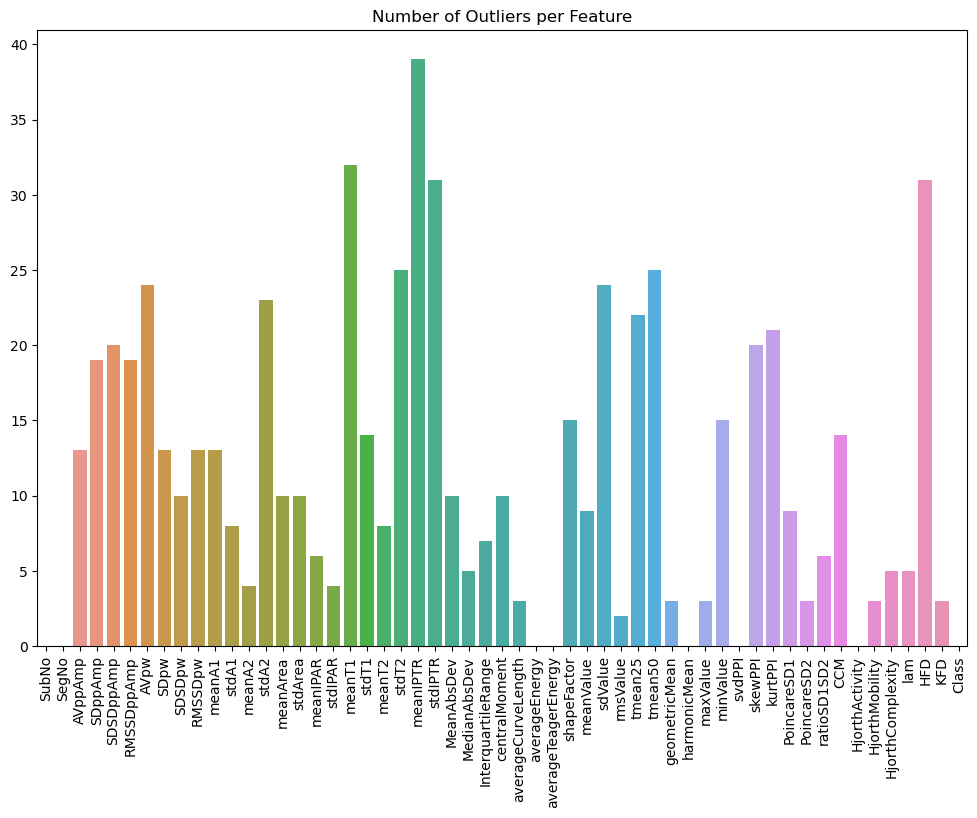

SubNo                   0
SegNo                   0
AVppAmp                13
SDppAmp                19
SDSDppAmp              20
RMSSDppAmp             19
AVpw                   24
SDpw                   13
SDSDpw                 10
RMSSDpw                13
meanA1                 13
stdA1                   8
meanA2                  4
stdA2                  23
meanArea               10
stdArea                10
meanIPAR                6
stdIPAR                 4
meanT1                 32
stdT1                  14
meanT2                  8
stdT2                  25
meanIPTR               39
stdIPTR                31
MeanAbsDev             10
MedianAbsDev            5
InterquartileRange      7
centralMoment          10
averageCurveLength      3
averageEnergy           0
averageTeagerEnergy     0
shapeFactor            15
meanValue               9
sdValue                24
rmsValue                2
tmean25                22
tmean50                25
geometricMean           3
harmonicMean

In [5]:
# Detect outliers using z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = z_scores > 3

# Count the number of outliers per column
outliers_count = np.sum(outliers, axis=0)

# Visualize the number of outliers in each feature
plt.figure(figsize=(12, 8))
sns.barplot(x=outliers_count.index, y=outliers_count)
plt.xticks(rotation=90)
plt.title('Number of Outliers per Feature')
plt.show()

outliers_count


In [6]:
# The outliers in the dataset are handled by replacing them with the capped value
def cap_outliers(df):
    """
    Caps outliers in all columns of a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    pd.DataFrame: DataFrame with outliers capped.
    """
    df_cap = df.copy()
    
    # Loop through all columns in the DataFrame
    for column in df_cap.columns:
        if pd.api.types.is_numeric_dtype(df_cap[column]):
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            q1 = df_cap[column].quantile(0.25)
            q3 = df_cap[column].quantile(0.75)
            iqr = q3 - q1
            
            # Define lower and upper bounds
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Cap the outliers
            df_cap[column] = df_cap[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_cap
    
df_capped = cap_outliers(data)


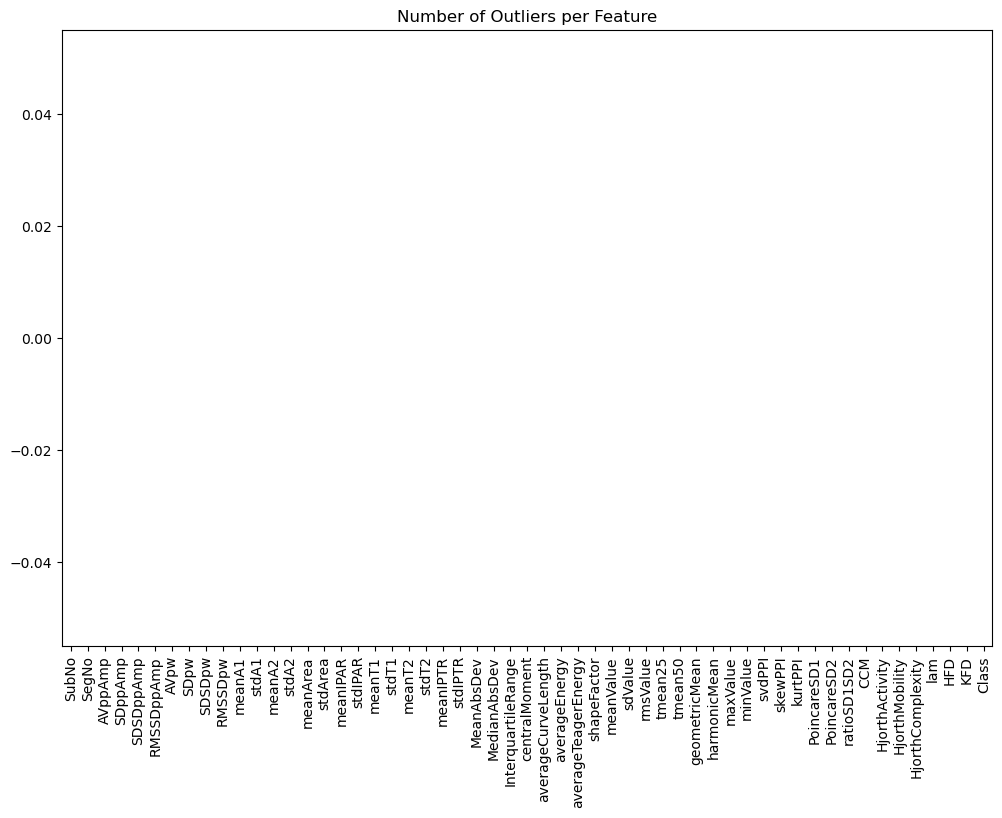

SubNo                  0
SegNo                  0
AVppAmp                0
SDppAmp                0
SDSDppAmp              0
RMSSDppAmp             0
AVpw                   0
SDpw                   0
SDSDpw                 0
RMSSDpw                0
meanA1                 0
stdA1                  0
meanA2                 0
stdA2                  0
meanArea               0
stdArea                0
meanIPAR               0
stdIPAR                0
meanT1                 0
stdT1                  0
meanT2                 0
stdT2                  0
meanIPTR               0
stdIPTR                0
MeanAbsDev             0
MedianAbsDev           0
InterquartileRange     0
centralMoment          0
averageCurveLength     0
averageEnergy          0
averageTeagerEnergy    0
shapeFactor            0
meanValue              0
sdValue                0
rmsValue               0
tmean25                0
tmean50                0
geometricMean          0
harmonicMean           0
maxValue               0


In [7]:
# Detect outliers again using z-score
z_scores = np.abs(stats.zscore(df_capped.select_dtypes(include=[np.number])))
outliers = z_scores > 3

# Count the number of outliers per column
outliers_count = np.sum(outliers, axis=0)

# Visualize the number of outliers in each feature
plt.figure(figsize=(12, 8))
sns.barplot(x=outliers_count.index, y=outliers_count)
plt.xticks(rotation=90)
plt.title('Number of Outliers per Feature')
plt.show()

outliers_count

In [8]:
# Separate features and target variable
X = df_capped.drop(columns=['Class'])
y = df_capped['Class']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Check the first few rows after scaling
X_scaled_df.head()


,SubNo,SegNo,AVppAmp,SDppAmp,SDSDppAmp,RMSSDppAmp,AVpw,SDpw,SDSDpw,RMSSDpw,...,PoincareSD1,PoincareSD2,ratioSD1SD2,CCM,HjorthActivity,HjorthMobility,HjorthComplexity,lam,HFD,KFD
0,0.0,-1.730661,-2.551838,-2.116035,-1.441445,-1.652320,-2.639082,1.629353,0.688903,0.999919,...,-2.407658,2.402273,-2.409948,-2.653900,0.0,-2.381830,2.464187,-2.548445,2.430922,-2.395881
1,0.0,-1.727881,2.745877,2.443659,1.904271,2.533307,-2.639082,1.371451,0.116147,0.561046,...,2.409547,-2.339042,2.396245,2.555255,0.0,2.331739,-2.617478,-2.548445,2.430922,2.303036
2,0.0,-1.725101,2.745877,2.406439,1.540377,2.330855,-2.639082,1.348468,0.584883,1.138340,...,2.409547,-2.339042,2.396245,2.555255,0.0,2.331739,-2.617478,-2.548445,2.430922,2.303036
3,0.0,-1.722321,2.745877,2.443659,2.025384,2.533307,-2.639082,1.776655,0.671424,1.770519,...,2.409547,-2.339042,2.396245,2.555255,0.0,2.331739,-2.617478,-2.548445,2.430922,2.303036
4,0.0,-1.719541,-2.551838,-2.031136,-1.390762,-1.605016,-2.639082,1.281335,0.674686,1.112862,...,-2.407658,2.402273,-2.409948,-2.653900,0.0,-2.381830,2.464187,-2.548445,2.430922,-2.395881


Logistic Regression Accuracy: 0.696
Random Forest Accuracy: 0.748

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.38      0.46        34
           2       0.52      0.62      0.56        52
           3       0.00      0.00      0.00         9
           4       0.62      0.80      0.70        20
           5       1.00      0.29      0.44         7
           6       0.81      0.87      0.84       128

    accuracy                           0.70       250
   macro avg       0.59      0.49      0.50       250
weighted avg       0.68      0.70      0.68       250


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.52      0.47      0.49        34
           2       0.61      0.63      0.62        52
           3       0.33      0.11      0.17         9
           4       0.83      0.95      0.88        20
           5       0.00      0.00   

/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1574 - loss: -7.2701 - val_accuracy: 0.1360 - val_loss: -25.9850
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1693 - loss: -36.2663 - val_accuracy: 0.1360 - val_loss: -88.5694
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1393 - loss: -114.5650 - val_accuracy: 0.1360 - val_loss: -248.4112
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1540 - loss: -306.0617 - val_accuracy: 0.1360 - val_loss: -559.5849
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1646 - loss: -663.4899 - val_accuracy: 0.1360 - val_loss: -1104.7280
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1357 - loss: -1343.7870 - val_accuracy: 0.1360 - val_loss: -1987.1240
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1595 - loss: -2174.8311 - val_accuracy: 0.1360 - val_loss: -3245.1321
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1712 - loss

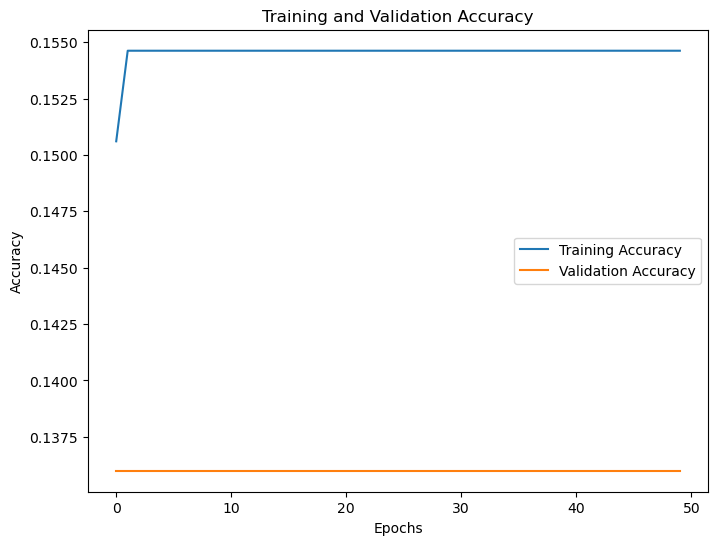

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=100)

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


#  a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


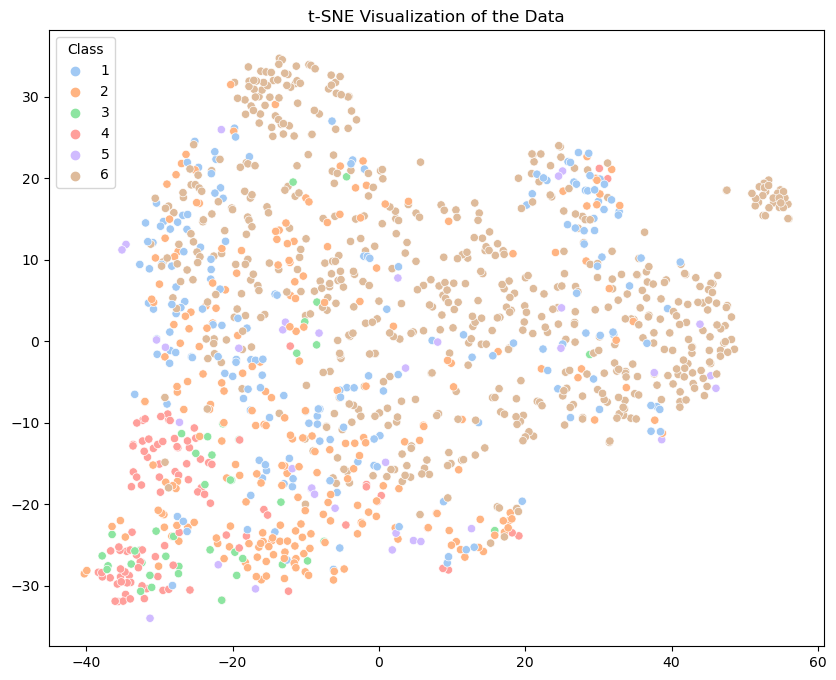

In [10]:
# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='pastel')
plt.title('t-SNE Visualization of the Data')
plt.show()

In [11]:
# Hyperparameter tuning for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train, y_train)

# Best parameters and model
best_rf = random_search_rf.best_estimator_
print("Best Random Forest Parameters:", random_search_rf.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [12]:

# Create a stacking model with Random Forest, Logistic Regression, and SVM
stacking_model = StackingClassifier(
    estimators=[('rf', best_rf), ('log_reg', log_reg), ('svm', SVC(probability=True))],
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=30)),
                               ('log_reg', LogisticRegression(max_iter=1000)),
                               ('svm', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [13]:
# Perform 5-fold cross-validation on the stacking model
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.7        0.67336683 0.73366834 0.72864322 0.70854271]
Average CV Score: 0.7088442211055276


In [14]:

# Example of adding Conv1D layers for a deep learning model
model_adv = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_adv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the advanced model
history_adv = model_adv.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train,
                            validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test),
                            epochs=50, verbose=1)


Epoch 1/50


/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1335 - loss: -20.3352 - val_accuracy: 0.1360 - val_loss: -134.1486
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1539 - loss: -209.9395 - val_accuracy: 0.1360 - val_loss: -598.9719
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1670 - loss: -812.3412 - val_accuracy: 0.1360 - val_loss: -1794.1091
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1544 - loss: -2275.0508 - val_accuracy: 0.1360 - val_loss: -4190.7466
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1490 - loss: -5042.6045 - val_accuracy: 0.1360 - val_loss: -8316.0107
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1649 - loss: -9279.0889 - val_accuracy: 0.1360 - val_loss: -14769.7471
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1652 - loss: -16772.1719 - val_accuracy: 0.1360 - val_loss: -24160.0957
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1517 - l

In [15]:
# Adjust labels to start from 0
y_adjusted = y - 1  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.2, random_state=42)

# Convert DataFrames to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshape the data for LSTM input (samples, timesteps, features)
# Assuming each row is a sample and you want a single timestep with all features as input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM RNN model with adjustments
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.5),  # Increased dropout for better regularization
    LSTM(64),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),  # Increased dropout
    Dense(len(np.unique(y_adjusted)), activation='softmax')  # Correct output layer, no extra class
])

# Compile the model using TensorFlow with a reduced learning rate and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

# Train the model with additional callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100


/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.2693 - loss: 1.8145 - val_accuracy: 0.5120 - val_loss: 1.5872 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5028 - loss: 1.5630 - val_accuracy: 0.5120 - val_loss: 1.3753 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4829 - loss: 1.4650 - val_accuracy: 0.5120 - val_loss: 1.3107 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4825 - loss: 1.4189 - val_accuracy: 0.5120 - val_loss: 1.2490 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4791 - loss: 1.3771 - val_accuracy: 0.5120 - val_loss: 1.2142 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5018 - loss: 1.3062 - val_accuracy: 0.5120 - val_loss: 1.1906 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4842 - loss: 1.2812 - val_accuracy

In [16]:
def plot_acc_loss(model):
    """Plots the training and validation loss"""
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(model.history['loss'], label='Training Loss')
    plt.plot(model.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(model.history['accuracy'], label='Training Accuracy')
    plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

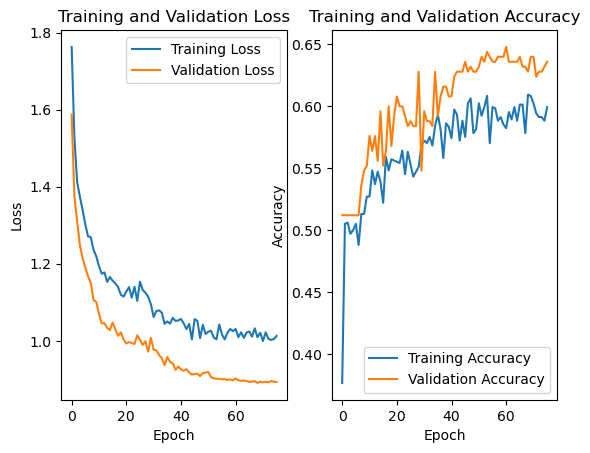

In [17]:
plot_acc_loss(history)

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.2, random_state=42)
# Initializing different classifiers
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svc_clf = SVC(random_state=42)

# Training the classifiers
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)

# Making predictions on the test set
rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)
svc_pred = svc_clf.predict(X_test)

# Evaluating the models
rf_acc = accuracy_score(y_test, rf_pred)
gb_acc = accuracy_score(y_test, gb_pred)
svc_acc = accuracy_score(y_test, svc_pred)

# Generating classification reports
rf_report = classification_report(y_test, rf_pred)
gb_report = classification_report(y_test, gb_pred)
svc_report = classification_report(y_test, svc_pred)




/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [19]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.48      0.32      0.39        34
           1       0.59      0.67      0.63        52
           2       0.50      0.11      0.18         9
           3       0.83      0.95      0.88        20
           4       0.00      0.00      0.00         7
           5       0.83      0.92      0.87       128

    accuracy                           0.74       250
   macro avg       0.54      0.50      0.49       250
weighted avg       0.70      0.74      0.71       250



In [20]:
print(svc_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         7
           5       0.51      1.00      0.68       128

    accuracy                           0.51       250
   macro avg       0.09      0.17      0.11       250
weighted avg       0.26      0.51      0.35       250



In [21]:
print(gb_report)

              precision    recall  f1-score   support

           0       0.57      0.47      0.52        34
           1       0.67      0.75      0.71        52
           2       0.67      0.22      0.33         9
           3       0.86      0.95      0.90        20
           4       1.00      0.29      0.44         7
           5       0.90      0.96      0.93       128

    accuracy                           0.80       250
   macro avg       0.78      0.61      0.64       250
weighted avg       0.80      0.80      0.79       250



In [22]:
# Since the labels are imbalanced
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [23]:
# Initializing Gradient Boosting with a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Performing Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='accuracy')

# Fitting the model on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   3.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=1

In [24]:
best_pred = best_model.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)
best_report = classification_report(y_test, best_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", best_acc)
print("Classification Report:\n", best_report)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Test Accuracy: 0.792
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53        34
           1       0.70      0.67      0.69        52
           2       0.50      0.33      0.40         9
           3       0.82      0.90      0.86        20
           4       0.56      0.71      0.62         7
           5       0.94      0.92      0.93       128

    accuracy                           0.79       250
   macro avg       0.67      0.68      0.67       250
weighted avg       0.80      0.79      0.79       250



In [25]:
# Standardizing the features for better performance in neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the data to 3D for LSTM [samples, timesteps, features]
# In this case, timesteps=1, assuming no additional time dimension in the data
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
# Building a deeper LSTM model with two LSTM layers
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
stacked_lstm_eval = model.evaluate(X_test_lstm, y_test)
y_pred_stacked_lstm = model.predict(X_test_lstm)
y_pred_stacked_lstm_labels = y_pred_stacked_lstm.argmax(axis=1)

# Print evaluation results
print("Stacked LSTM Test Accuracy:", stacked_lstm_eval[1])

/Users/jasper/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3569 - loss: 1.9190 - val_accuracy: 0.5120 - val_loss: 1.7215
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5095 - loss: 1.5634 - val_accuracy: 0.6000 - val_loss: 1.1519
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5790 - loss: 1.2078 - val_accuracy: 0.6440 - val_loss: 1.0188
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6034 - loss: 1.0314 - val_accuracy: 0.6560 - val_loss: 0.9713
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5962 - loss: 1.0164 - val_accuracy: 0.6720 - val_loss: 0.9364
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6178 - loss: 0.9984 - val_accuracy: 0.6680 - val_loss: 0.9182
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6725 - loss: 0.8969 - val_accuracy: 0.6800 - val_loss: 0.9080
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6437 - loss: 0.9221 - val_accuracy: 0.6880 - val_los

In [27]:
# Convert the dataset into LightGBM Dataset format
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

# Set the parameters for LightGBM
params = {
    'objective': 'multiclass',
    'num_class': 6,
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the LightGBM model
NUM_ROUND = 100  
model = lgb.train(params, train_data, NUM_ROUND, valid_sets=[test_data], callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(50)])

Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.560387
[100]	valid_0's multi_logloss: 0.542664
Did not meet early stopping. Best iteration is:
[67]	valid_0's multi_logloss: 0.531482


In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled, num_iteration=model.best_iteration)
y_pred_labels = [np.argmax(pred) for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"LightGBM Test Accuracy: {accuracy}")



LightGBM Test Accuracy: 0.78


In [29]:
COMM = "data/"
# Assume you have a list of file paths for all 10 subjects
file_paths = [COMM + "sub_1.csv", COMM + "sub_2.csv", COMM + "sub_3.csv", COMM + "sub_4.csv", COMM + "sub_5.csv", COMM + "sub_6.csv", COMM + "sub_7.csv", COMM + "sub_8.csv", COMM + "sub_9.csv"]

# Load and combine all datasets
dfs = [pd.read_csv(file_path) for file_path in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

# Separate features and target
X_combined = combined_df.iloc[:, :-1]  # Features
y_combined = combined_df.iloc[:, -1]   # Target

# Encode the target labels (if necessary)
label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(y_combined)


In [30]:
# Scale the features
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_scaled, y_combined_encoded, test_size=0.2, random_state=42)

In [32]:
# Initialize the LGBMClassifier
model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(label_encoder.classes_),
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    min_data_in_leaf=20,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    n_estimators=100
)



In [34]:
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, random_state=42)
svc_clf = SVC(random_state=42)

# Training the classifiers
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)

SVC(random_state=42)

In [35]:
# Making predictions on the test set
rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)
svc_pred = svc_clf.predict(X_test)

# Evaluating the models
rf_acc = accuracy_score(y_test, rf_pred)
gb_acc = accuracy_score(y_test, gb_pred)
svc_acc = accuracy_score(y_test, svc_pred)

# Generating classification reports
rf_report = classification_report(y_test, rf_pred)
gb_report = classification_report(y_test, gb_pred)
svc_report = classification_report(y_test, svc_pred)

In [36]:
model.fit(X_train, y_train)
lgm_pred = model.predict(X_test)

In [37]:
rf_acc

0.6836912362159024

In [38]:
gb_acc

0.7278003482298316

In [39]:
svc_acc

0.6111433546140452

In [40]:
lgm_acc = accuracy_score(y_test, lgm_pred)
lgm_acc

0.7283807312826466

In [41]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=20)),
    ('gb', GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lgbm', lgb.LGBMClassifier(
        objective='multiclass', 
        num_class=len(label_encoder.classes_),
        boosting_type='gbdt',
        learning_rate=0.05,
        num_leaves=31,
        max_depth=-1,
        min_data_in_leaf=20,
        feature_fraction=0.9,
        bagging_fraction=0.8,
        bagging_freq=5,
        verbose=-1,
        n_estimators=100
    ))
]
meta_model = LogisticRegression()

# Create the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Test Accuracy: {accuracy}")

Stacking Model Test Accuracy: 0.730702263493906


In [42]:
target_names = [str(int(label)) for label in label_encoder.classes_]
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

           1       0.55      0.43      0.48       228
           2       0.64      0.78      0.71       472
           3       0.68      0.52      0.59       178
           4       0.72      0.50      0.59        68
           5       0.80      0.72      0.76       142
           6       0.85      0.89      0.87       635

    accuracy                           0.73      1723
   macro avg       0.71      0.64      0.67      1723
weighted avg       0.73      0.73      0.72      1723



In [43]:

# Save the trained model for future use
with open('combined_model.pkl', 'wb') as file:
    pickle.dump(stacking_model, file)
